In [ ]:
"""
@Author: TUSHAR SINGH
@Tpoic: Emotion Recoginition
@DataSet: https://borealisdata.ca/dataset.xhtml?persistentId=doi%3A10.5683%2FSP2%2FE8H2MF
@Reference: https://librosa.org/doc/latest/index.html
"""

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import librosa


In [ ]:
path = []
labels = []
for dirname , _ , filenames in os.walk('/content/drive/MyDrive/TESS Toronto emotional speech set data'):
  for filename in filenames:
    path.append(os.path.join(dirname, filename))
    label = filename.split('_')[-1]
    label = label.split('.')[0]
    labels.append(label.lower())


In [ ]:
df = pd.DataFrame()
df['speech'] = path
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/TESS Toronto emotional ...,ps
1,/content/drive/MyDrive/TESS Toronto emotional ...,ps
2,/content/drive/MyDrive/TESS Toronto emotional ...,ps
3,/content/drive/MyDrive/TESS Toronto emotional ...,ps
4,/content/drive/MyDrive/TESS Toronto emotional ...,ps


In [ ]:
df.shape

(5600, 2)

<Axes: xlabel='count', ylabel='label'>

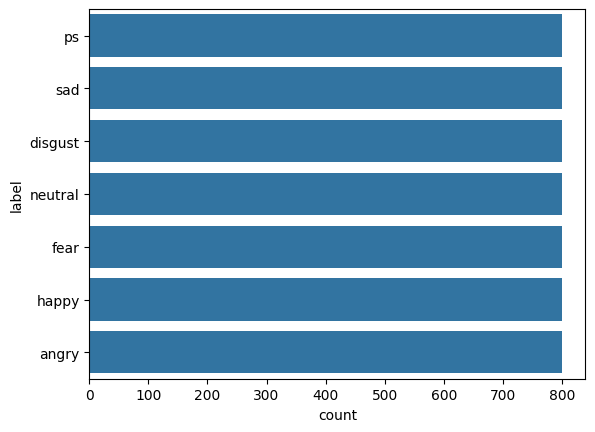

In [ ]:
import seaborn as sns

sns.countplot(df['label'])

In [ ]:
def extract(filename):
  y , sr  = librosa.load(filename, duration = 3, offset = .5)
  mfcc = np.mean(librosa.feature.mfcc(y = y , sr = sr, n_mfcc = 40), axis = 1)
  return mfcc

In [ ]:
a = extract(df['speech'][0])
a

array([-3.4354654e+02,  6.5372772e+01, -2.0684774e+01, -3.4766371e+00,
       -1.7871458e+01,  4.5510238e-01, -1.3521511e+01, -2.7473341e+01,
        5.7571321e+00,  2.1820110e-01, -2.3355881e+01,  8.7116270e+00,
       -1.9902565e+01,  9.8665743e+00, -8.6829376e-01,  4.4158727e-01,
        9.9950323e+00,  6.4754977e+00, -1.4744730e+00,  4.0136406e-01,
       -5.3190875e+00,  7.2343144e+00, -3.5574009e+00,  3.4145436e+00,
       -4.7071069e-01, -2.5131431e+00,  3.3642902e+00,  3.2087507e+00,
        2.6960137e+00,  1.2556563e+01,  5.8849111e+00,  1.1496949e+01,
        4.1740737e+00,  5.4047298e+00,  6.9389224e+00,  9.1087513e+00,
        3.4581649e+00,  4.8955693e+00, -2.0310187e+00,  1.9540458e+00],
      dtype=float32)

[Text(0.5, 1.0, 'ps')]

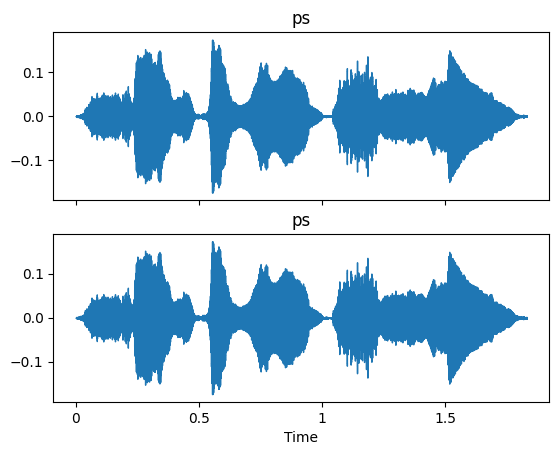

In [ ]:
x_1, fs = librosa.load(df['speech'][0])
# And a second version, slightly faster.
x_2, fs = librosa.load(df['speech'][0])
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.waveshow(x_1, sr=fs, ax=ax[0])
ax[0].set(title=df['label'][0])
ax[0].label_outer()

librosa.display.waveshow(x_2, sr=fs, ax=ax[1])
ax[1].set(title=df['label'][0])

In [ ]:
a_mfcc = df['speech'].apply(lambda x: extract(x))

In [ ]:
a_mfcc

0       [-343.54654, 65.37277, -20.684774, -3.4766371,...
1       [-360.17908, 57.33805, -29.098585, -3.1790545,...
2       [-371.841, 73.647354, -16.902231, 8.881896, -1...
3       [-342.9861, 94.82616, -24.713985, -26.03091, -...
4       [-391.19638, 80.00301, -17.48976, -1.6679263, ...
                              ...                        
5595    [-525.03876, 116.402504, 24.889055, -0.5271862...
5596    [-531.3894, 112.14655, 28.746452, -7.0238647, ...
5597    [-545.3089, 99.07752, 26.422247, 8.711021, 17....
5598    [-515.92, 102.69402, 17.308086, 4.1824827, 13....
5599    [-518.1542, 99.512314, 26.834148, 5.224762, 13...
Name: speech, Length: 5600, dtype: object

In [ ]:
x = [x for x in a_mfcc]
x = np.array(x)
x = np.expand_dims(x, -1)
x.shape

(5600, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
enc.get_feature_names_out()

array(['label_angry', 'label_disgust', 'label_fear', 'label_happy',
       'label_neutral', 'label_ps', 'label_sad'], dtype=object)

In [ ]:
y = y.toarray()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM , Dropout


model = Sequential([

                    LSTM(256, return_sequences= False , input_shape= (40,1) ),
                    Dropout(.2),
                    Dense(128, activation = 'relu'),
                    Dropout(.1),
                    Dense(64, activation = 'relu'),
                    Dropout(.1),
                    Dense(7 , activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                

In [ ]:
# it's just a sample testing, make sure to run this for considerable epoch's
history = model.fit(x, y, validation_split=0.2, epochs=5, batch_size=64)

Epoch 1/5
70/70 [==============================] - 4s 14ms/step - loss: 0.6835 - accuracy: 0.7449 - val_loss: 0.2777 - val_accuracy: 0.8929
Epoch 2/5
70/70 [==============================] - 0s 6ms/step - loss: 0.1956 - accuracy: 0.9375 - val_loss: 0.3085 - val_accuracy: 0.8929
Epoch 3/5
70/70 [==============================] - 0s 6ms/step - loss: 0.1143 - accuracy: 0.9607 - val_loss: 0.0835 - val_accuracy: 0.9714
Epoch 4/5
70/70 [==============================] - 1s 7ms/step - loss: 0.1092 - accuracy: 0.9645 - val_loss: 0.0889 - val_accuracy: 0.9643
Epoch 5/5
70/70 [==============================] - 0s 6ms/step - loss: 0.0958 - accuracy: 0.9670 - val_loss: 0.1184 - val_accuracy: 0.9616
